# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

# Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Background:
- The dealership today sets prices based on their experience, rather than having a market based approach to understand what the price should be.
- In the car industry having a large inventory of cars is capital expensive so turn-around time is critical. To high a price will keep the car sitting on the lot to long. To low a price means that the dealership left room for additional profit.
- When customers try to negotiate for prices then understanding the true market price, will give the dealership more leverage.
- Knowledge about how especially different features impact the price can be valuable also.

Examples of features impacting a price:
- does the color of the car impact the price, and if so what colors have different impact.
- what is the impact of a title missing.
- what is the current supply/demand of different models, and how does that impact the price.


Objective:
- Use a larger dataset of 426k car as starting point to get a more representative base.
- Produce a model where the used car dealership can simply plug in the cars features and get a suggested sales price returned
  based on the existing market. 



# Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Purpose:

- Make some consideration and assumptions regarding the dataset provided.
- Use visualization and other techniques to understand the distribution of the features.
- Clean up / filter the data as needed. 
- Identify correlation between correlation between price and the features. This will help me prioritize the features I will continue working with.
- The final product will be a dataset called vehicles_cleaned. This dataset has to be of a considerable size and quality, so following steps can be done correctly.

### Considerations and assumptions:

- Large dataset: The 426k dataset is assumed to be randomly picked from the original 3m dataset.
- Offered or actual: According to Statistica(1) 38..6 million cars was sold in 2022. My first thought was if this was car put for sale, and hence the price would not reflect a true price of what it was sold for, but I will assume it is the actual sales price.
- Private or Dealership: There is not a feature in the dataset saying if these prices were private sales or dealership sales. According to Kelly Blue Book theres is a significant difference, so for the sake of simplicity, then I will assume it is dealership prices.
- History: There is not a feature identifying the time of the price (the sale), so it may historic price that could be impacted by changes in inflation, supply/demand and other market factors.
- Freedom: The dataset is still very large at 426k which affords us to cut out a lot of records due to missing values, rather than approximating value of features for records not available. As I proceed I will of course keep an eye on this.
- US vs Foreign: The dataset has a wide range of US and foreign based manufacturers, as well as electric and combustion engine cars, and for this I will focus on combustion. It also has a very wide range of ages of cars. I assume that this dealership focuses at cars maybe max 20-30 years old. I will look into that also.

Approach:
- Distribution: I will look at the variance within the dataset for 
- Correlation:
- Feature selection for inital cleaned dataset.

(1) https://www.statista.com/statistics/183713/value-of-us-passenger-cas-sales-and-leases-since-1990/#:~:text=Sales%20of%20used%20light%20vehicles,38.6%20million%20units%20in%202022.

#### Load csv file into dataframe 

In [385]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

vehicles = pd.read_csv('data/vehicles.csv',)
#vehicles = vehicles.copy(deep=True)
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

#### Describe:

In [386]:
# Initial describe of raw data
# transforming values to integer for better presentation.

pd.set_option('display.float_format', lambda x: '%3f' % x)

df_describe = vehicles.describe()

for column in df_describe.select_dtypes(include=[np.number]).columns:
    df_describe[column] = df_describe[column].astype(int)
     
print('Describe:\n', df_describe)


Describe:
                id       price    year  odometer
count      426880      426880  425675    422480
mean  -2147483648       75199    2011     98043
std       4473170    12182282       9    213881
min   -2147483648           0    1900         0
25%   -2147483648        5900    2008     37704
50%   -2147483648       13950    2013     85548
75%   -2147483648       26485    2017    133542
max   -2147483648 -2147483648    2022  10000000


#### Insight:
- Some big outliers for price and odometer. I will filter for this later.

#### Null values:

In [387]:
# count of null values for each feature
print('Count of null values for each feature: \n', vehicles.isnull().sum())

Count of null values for each feature: 
 id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


#### Insight:
Lots of null values. I have a large dataset so will filter for this later and see if I have enough left.

#### Unique values:

In [388]:
# count of unique values for each feature
# - this gives me an idea of feasibility for categorical work
print('Count of unique values for each feature: \n', vehicles.nunique())

Count of unique values for each feature: 
 id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64


### Initial thoughts before cleaning and filtering

- Only a few numeric features 
- Lots of non-numeric features 
- Non-numeric features with lots of unique values: region, model, these can give issues for categorization.
- Removing VIN and id as they don't make sense regreasson.

###  Filtering

- removing columns VIN and id as they don't make sense for regreasson
- It's a large dataset so will remove records with null values and still have a considerable dataset.
- I assume that car dealership only sell the following:
  - Only American cars (no Tesla or Harley-Davidson)
  - Cars with Odometer between 1 and 100,000, 
  - Cars from 2000 until today

In [389]:
# remove features: id, VIN
vehicles1 = vehicles.drop(columns = ['id','VIN'])

In [390]:
vehicles1 = vehicles1.dropna(subset=['year', 'manufacturer','model','odometer','title_status','drive','condition','cylinders','size','type','paint_color','transmission'])
vehicles1.info()
print('Count of null values for each feature: \n',vehicles1.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 79195 entries, 31 to 426836
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        79195 non-null  object 
 1   price         79195 non-null  int64  
 2   year          79195 non-null  float64
 3   manufacturer  79195 non-null  object 
 4   model         79195 non-null  object 
 5   condition     79195 non-null  object 
 6   cylinders     79195 non-null  object 
 7   fuel          79195 non-null  object 
 8   odometer      79195 non-null  float64
 9   title_status  79195 non-null  object 
 10  transmission  79195 non-null  object 
 11  drive         79195 non-null  object 
 12  size          79195 non-null  object 
 13  type          79195 non-null  object 
 14  paint_color   79195 non-null  object 
 15  state         79195 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 10.3+ MB
Count of null values for each feature: 
 region         

#### Distribution:

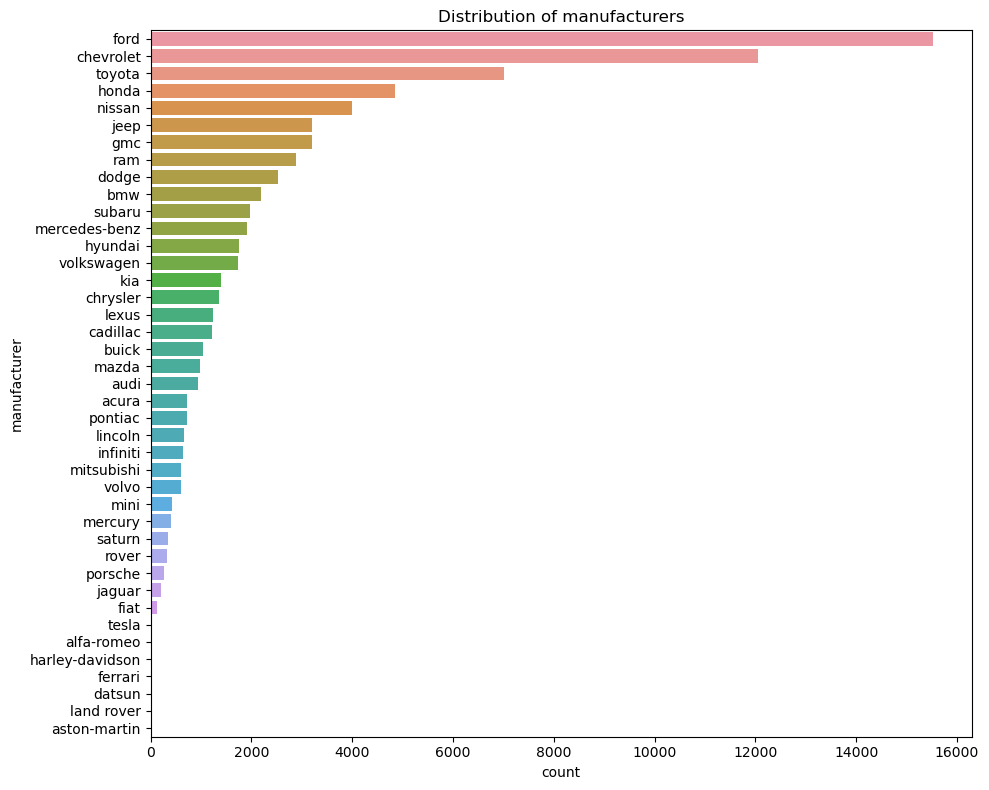

In [391]:
# Plotting the distribution of 'manufacturer' in vehicles1_converted
plt.figure(figsize=(10, 8))
sns.countplot(y='manufacturer', data=vehicles1, order=vehicles1['manufacturer'].value_counts().index)
plt.title('Distribution of manufacturers')
plt.xlabel('count')
plt.ylabel('manufacturer')
plt.tight_layout()
plt.show()

C:\Users\mgram1\AppData\Local\Temp\ipykernel_31288\630282597.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mgram1\AppData\Local\Temp\ipykernel_31288\630282597.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mgram1\AppData\Local\Temp\ipykernel_31288\630282597.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mgram1\AppData\Local\Temp\ipykernel_31288\630282597.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mgram1\AppData\Local\Temp\ipykernel_31288\630282597.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mgram1\AppData\Local\Temp\ipykernel_31288\630282597.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


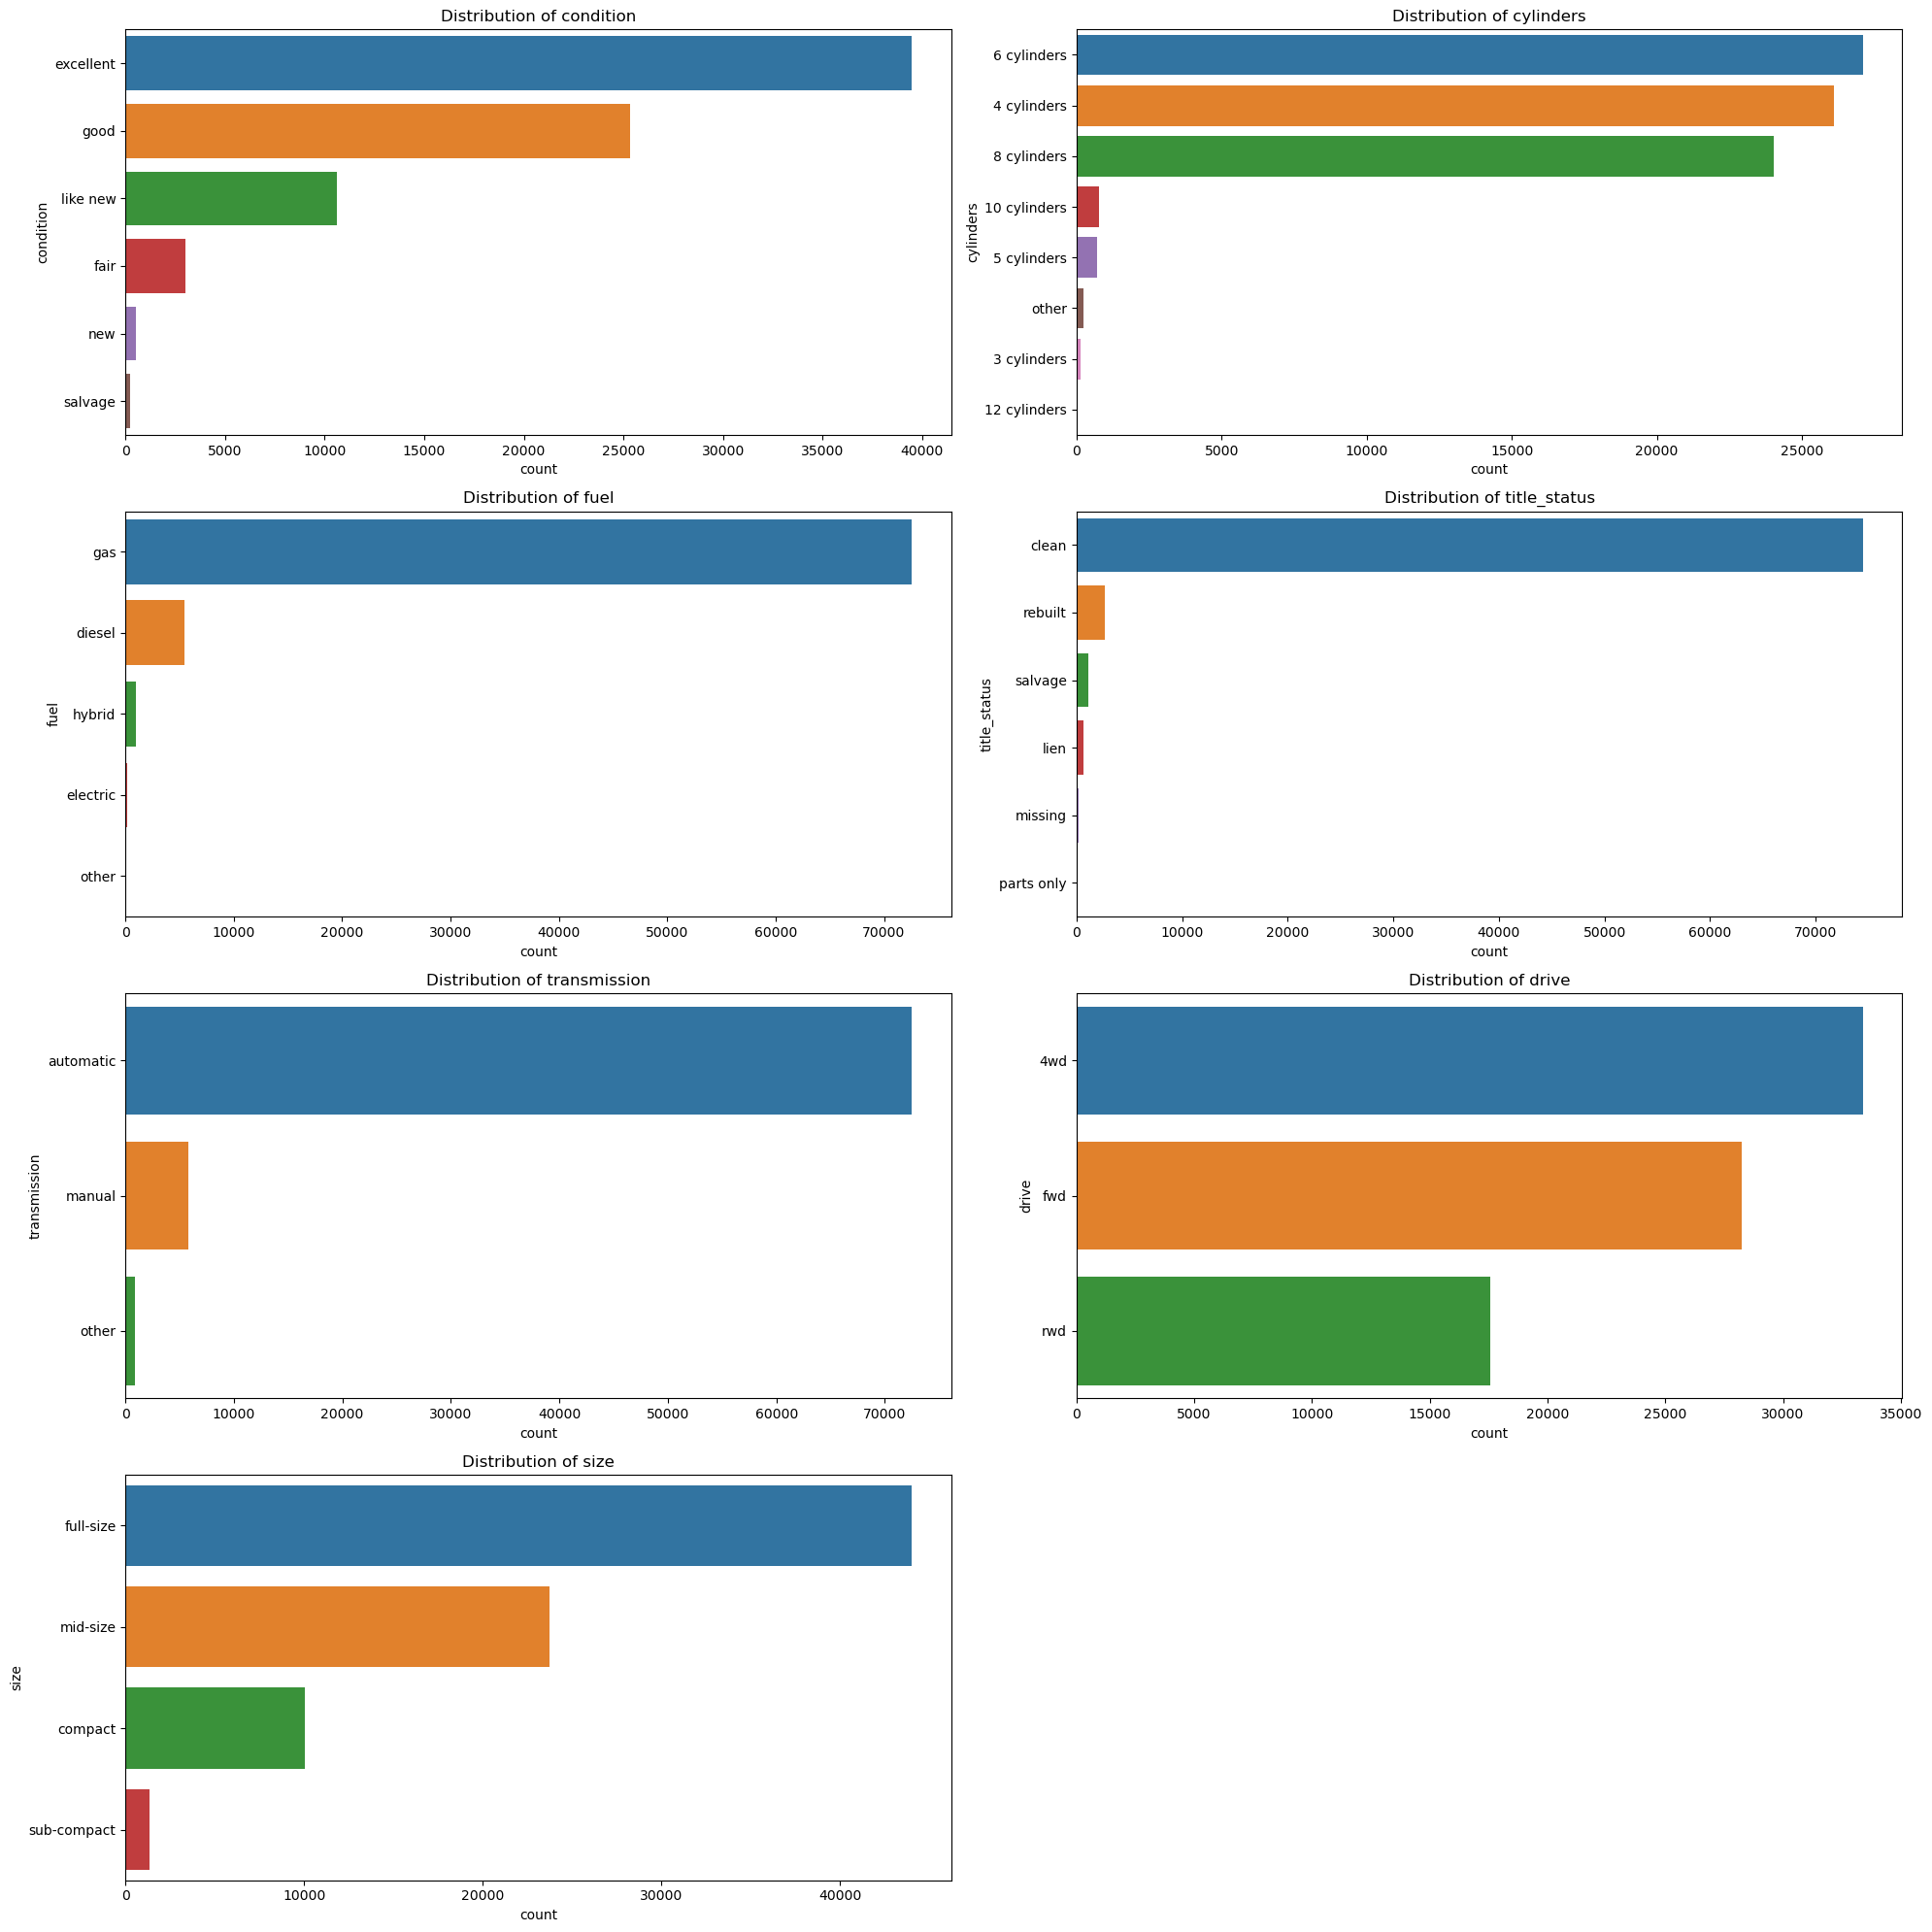

In [392]:
# Selecting specific columns for distribution plots
columns_of_interest = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size']

# Plotting distribution of selected features
plt.figure(figsize=(20, 20))
for index, column in enumerate(columns_of_interest):
    plt.subplot(4, 2, index + 1)
    sns.countplot(y=column, data=vehicles1, order=vehicles1[column].value_counts().index[:42])
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

Insight 
- condition, cylinders, drive and size show the best distribution. The others have values with to much weight. 
- I don't expect to see the others showing strong correlation but we will find out later.

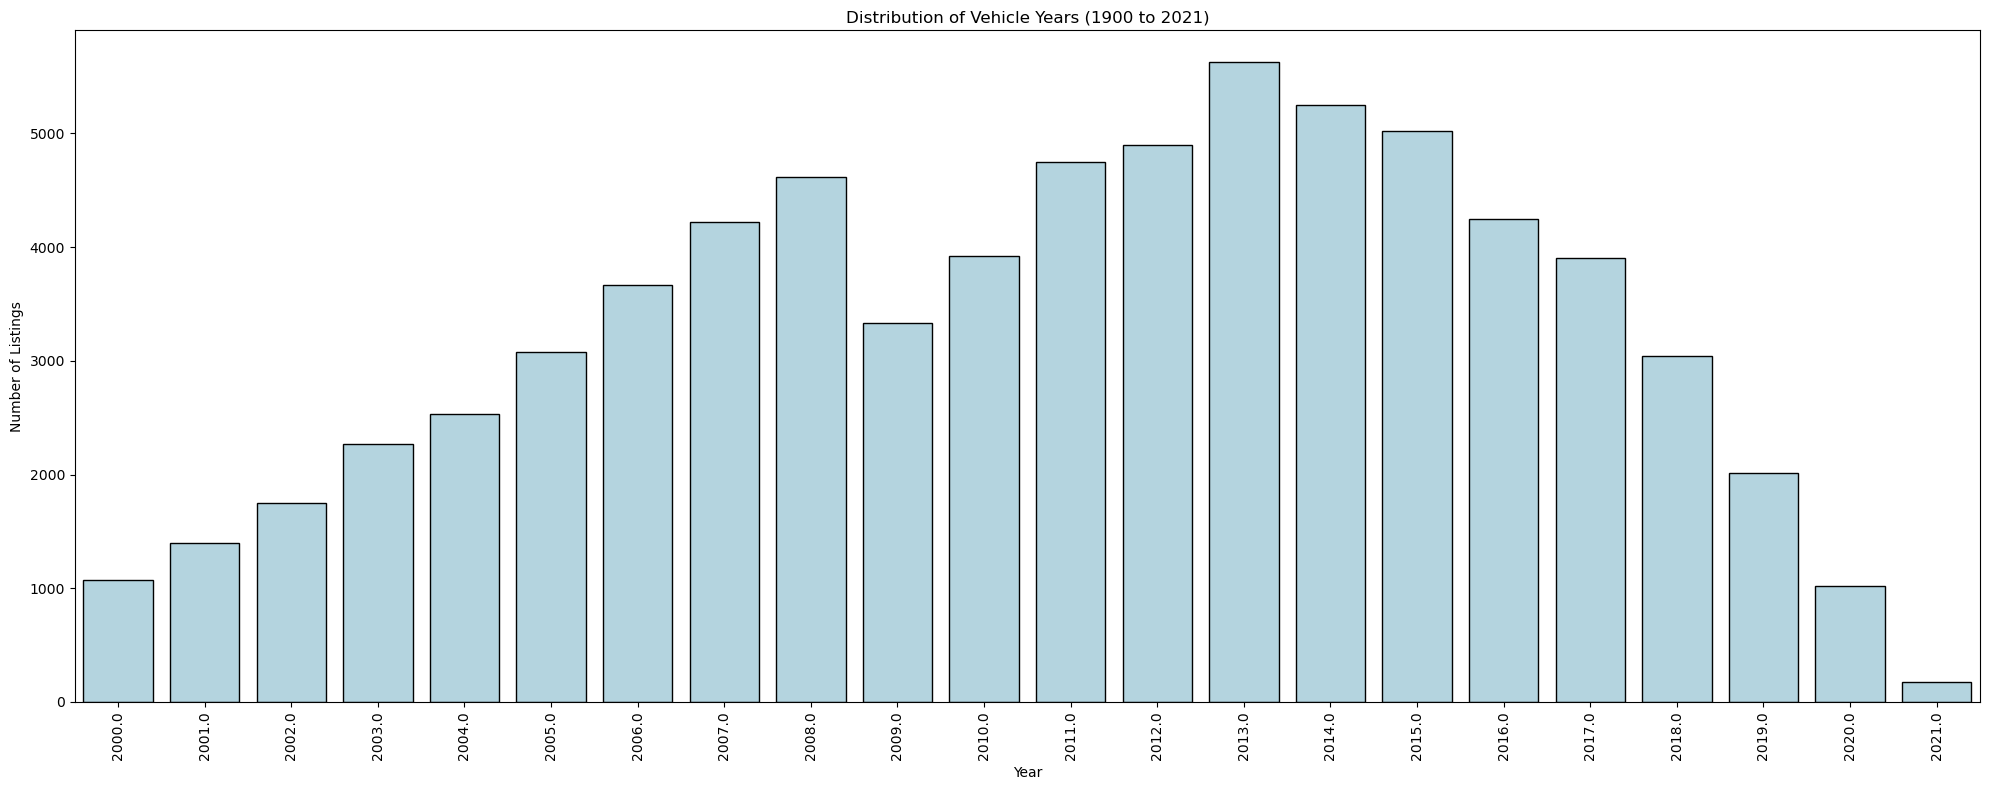

In [395]:
# Filtering the DataFrame for years between 2000 and 2021
filtered_years_vehicles = vehicles1[(vehicles1['year'] >= 2000) & (vehicles1['year'] <= 2021)]

plt.figure(figsize=(20, 8))
sns.countplot(x='year', data=filtered_years_vehicles, color="lightblue",edgecolor="black")
plt.title('Distribution of Vehicle Years (1900 to 2021)')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()


Insight:
- There is a natural increase in the first 10 years as people seek to sell their cars after buying them as new, and it then drops the last 10 years of the period.


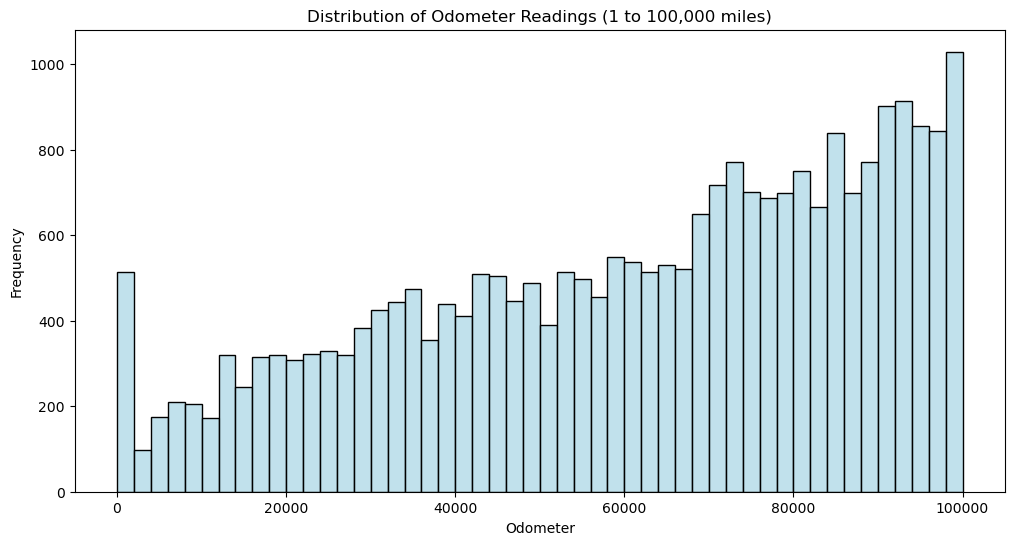

In [396]:
# plot odometer into histogram

plt.figure(figsize=(12, 6))
# Plotting without KDE to avoid the error, focusing on 'odometer' values between 1 and 100,000 miles
sns.histplot(filtered_odometer_vehicles['odometer'], bins=50, color="lightblue", edgecolor="black")
plt.title('Distribution of Odometer Readings (1 to 100,000 miles)')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

#### Insight:
- There is a natural incresed frequencey for cars with higher odometer.


### Cleaning / Filtering

- Removing columns id and VIN as they don't make sense for regression
- It's a large dataset so will remove records with null values and still have a considerable dataset.
- I assume that car dealership only sell the following:
  - American cars (no Tesla or Harley-Davidson)
  - Cars with Odometer < 100,000, 
  - Cars from 2000 until today
  - cars at prices below < 50,000
 - I will create a new features called "manufacturer_type" and see if it has any correlation.

#### Main filters:

In [404]:
# filters:
# price not 0 and below 50000
# odemeter not 0 and below 100000
# cars newer than 1980
vehicles1 = vehicles1[
    (vehicles1['price'] > 1) & 
    (vehicles1['price'] < 50000) & 
    (vehicles1['odometer'] > 1) & 
    (vehicles1['odometer'] <= 100000) & 
    (vehicles1['manufacturer'].notna()) & 
    (vehicles1['year'] >= 2000)
]

In [405]:
# keep only american manufacturers and ignore 'harley-davidson' and 'tesla'
american_manufacturers = [
    'ford', 'chevrolet', 'chrysler', 'dodge', 'jeep', 'ram', 
    'buick', 'cadillac', 'gmc', 'lincoln', 'pontiac', 
    'saturn', 'oldsmobile', 'mercury']

vehicles1 = vehicles1[vehicles1['manufacturer'].isin(american_manufacturers)]

In [417]:
# save cleaned data
vehicles1_cleaned = vehicles1.copy(deep=True)

#### Target variable distribution (price):

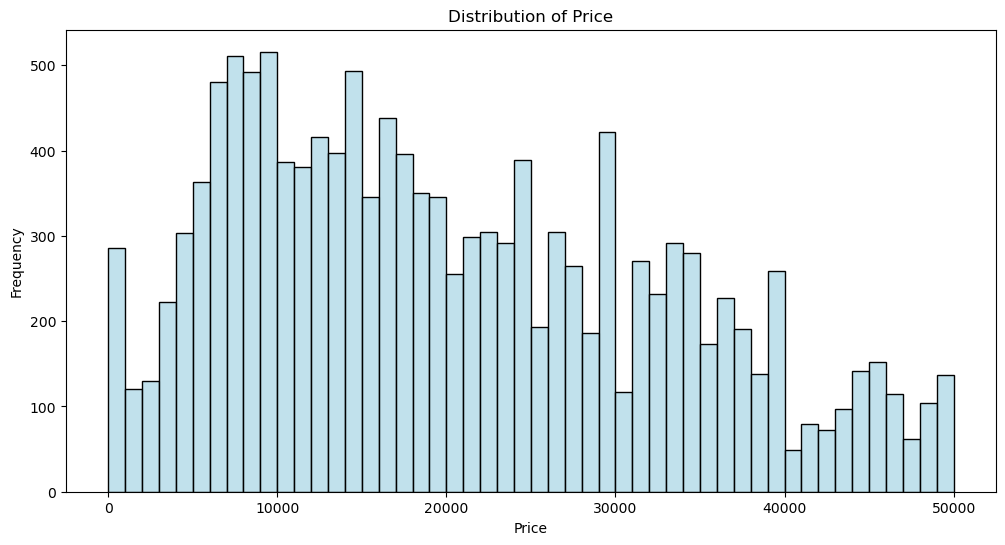

In [418]:
# plot price into histogram

plt.figure(figsize=(12, 6))
sns.histplot(vehicles1_cleaned['price'], bins=50, color="lightblue", edgecolor="black")
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Insight:
- Price isn't perfectly normalized and is a bit skewed but not to bad, so I will keep it for now without transforming price.

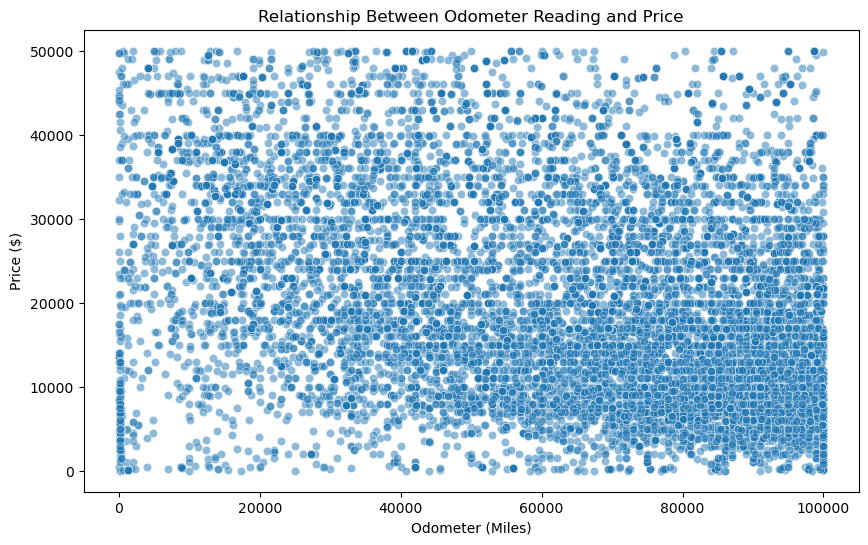

In [419]:
# scatterplot for odometer and price

plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=vehicles1_cleaned, alpha=0.5)
plt.title('Relationship Between Odometer Reading and Price')
plt.xlabel('Odometer (Miles)')
plt.ylabel('Price ($)')
plt.show()

#### Insight:

It looks like a downward sloop for prices as odometer increases but that is expected.



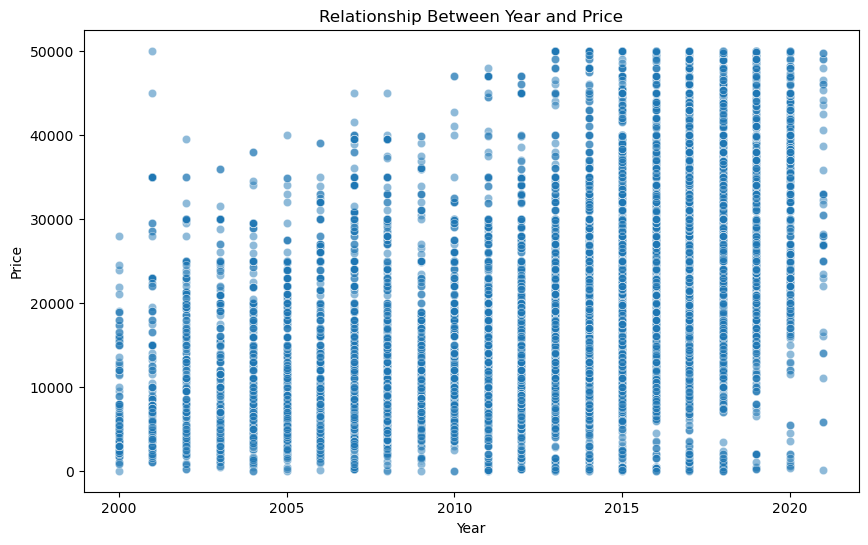

In [420]:
# scatterplot for year and price

pd.set_option('display.float_format', lambda x: '%3f' % x)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=vehicles1_cleaned, alpha=0.5)
plt.title('Relationship Between Year and Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

#### Insight:

It looks like a downward sloop for prices as cars get older but that is expected.



### Correlation

- I will use a sns.heatmap and present the features with highest correlation (absolute values) and pick the ones I will carry forward to data preparation and modeling.

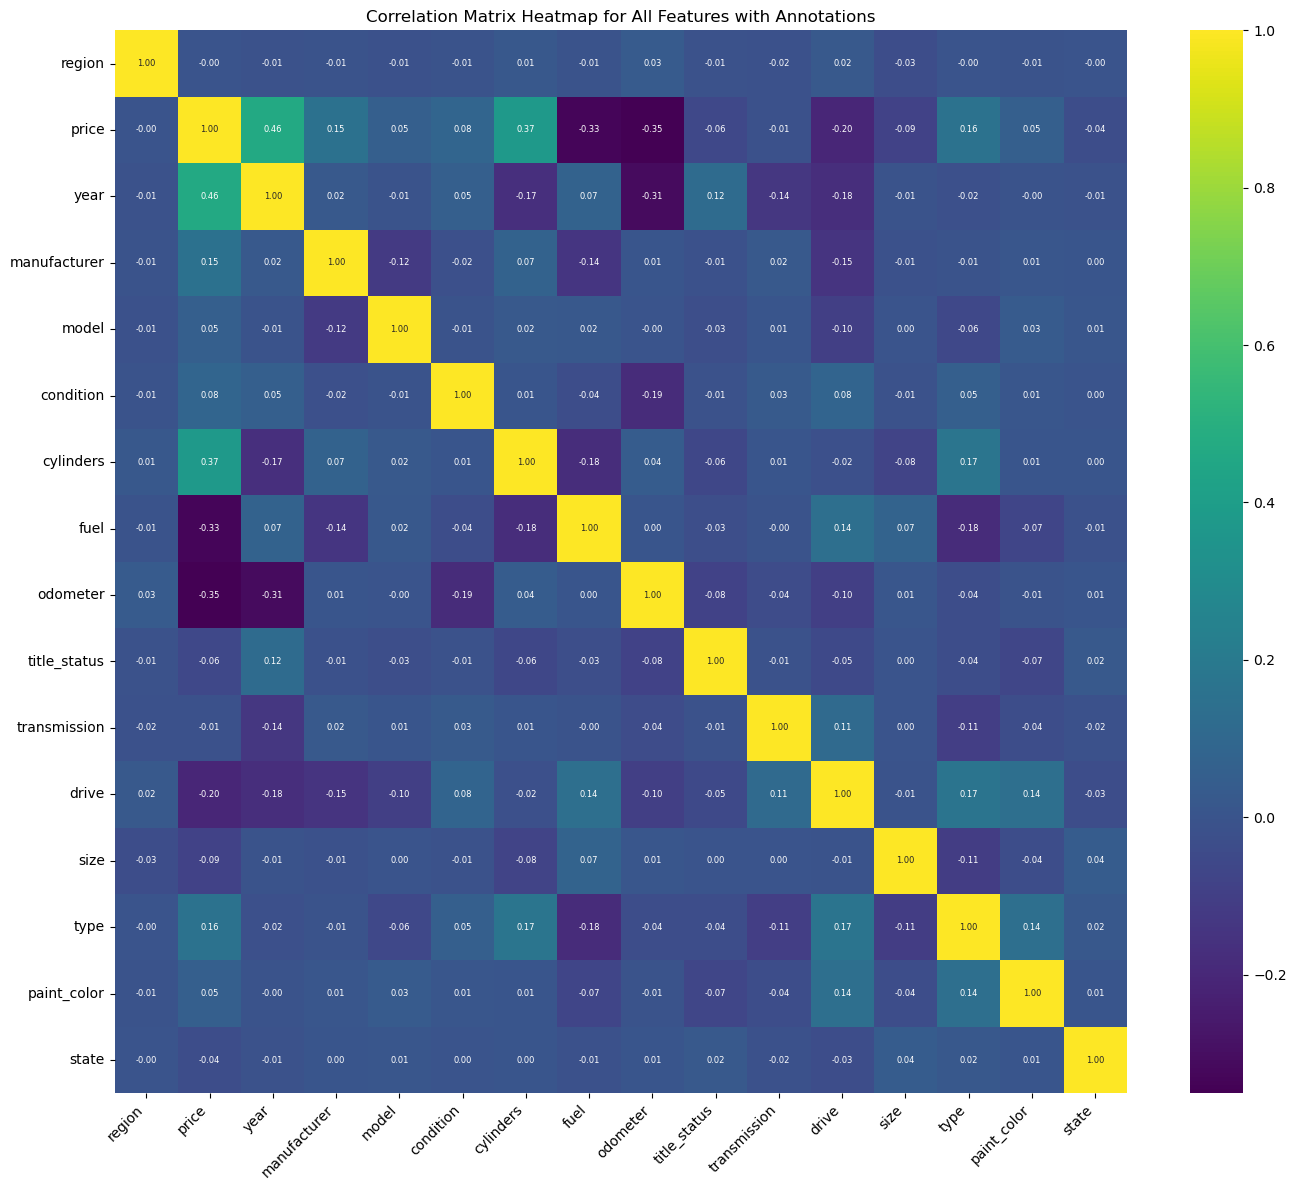

In [421]:
# create simple correlation mattrix for all features and show in heat map

# create table for correlation work
vehicles1_corr = vehicles1_cleaned.copy(deep=True)

# Identifying categorical columns that are still in object form
categorical_columns = vehicles1_corr.select_dtypes(include=['object', 'string']).columns.tolist()

vehicles1_corr_category = vehicles1_corr

# Applying Label Encoding to the remaining categorical columns
for col in categorical_columns:
    vehicles1_corr_category[col] = vehicles1_corr[col].astype('category').cat.codes

# Recalculating the correlation matrix with all features now as numeric
correlation_matrix_all_features = vehicles1_corr_category.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix_all_features, annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 6})
plt.title('Correlation Matrix Heatmap for All Features with Annotations')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [422]:
# show correlations in sorted absolute value:
position = correlation_matrix_all_features.index.get_loc('price') 
filtered = correlation_matrix_all_features.iloc[[position]]
filtered_transp = filtered.T
sorted_corr = filtered_transp.sort_values(by='price', key=abs, ascending=False)
print('Correlations for price:\n' , sorted_corr)

Correlations for price:
                  price
price         1.000000
year          0.464060
cylinders     0.374234
odometer     -0.350770
fuel         -0.329740
drive        -0.203997
type          0.160669
manufacturer  0.154216
size         -0.085606
condition     0.084560
title_status -0.060469
model         0.054264
paint_color   0.051914
state        -0.035689
transmission -0.014900
region       -0.001852


In [425]:
# reduce columns with best correlated features:
vehicles1_cleaned = vehicles1_cleaned[['price', 'year', 'cylinders', 'odometer' ,'fuel', 'type', 'manufacturer', 'size', 'condition']].copy(deep=True)

### Result: 

I will be using the following feautures for the rest of the exercise:
        
        year, cylinders, odometer, fuel, type, manufacturer, size, condition

# Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Purpose:

I will based on the correlation create two datasets: 

    - vehicles1_encoded
    - vehicles1_scaled

In [426]:
vehicles1_encoded = vehicles1_cleaned.copy(deep=True)

### OneHotEncoder

- Use OneHotEncoder to create list of features resulting in all numerical features, so regression is possible.
- Output is vehicles1_encoded

In [452]:
from sklearn.preprocessing import OneHotEncoder

# Selecting categorical variables for one-hot encoding
categorical_variables = ['fuel', 'type', 'manufacturer', 'size', 'condition']

# Applying OneHotEncoder to the categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(vehicles1_encoded[categorical_variables])

# Creating a DataFrame for the encoded features
encoded_features = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_variables))

# Resetting index on 'vehicle1_encoded' to concatenate properly
vehicles1_encoded_reset = vehicles1_encoded.reset_index(drop=True)

# Concatenating the encoded features with the rest of the data
vehicles1_encoded_features = pd.concat([vehicles1_encoded_reset.drop(columns=categorical_variables), encoded_features], axis=1)

# Summary of the resulting dataset with encoded features
resulting_summary_encoded_features = {
    "Number of rows": vehicles1_encoded_features.shape[0],
    "Number of columns": vehicles1_encoded_features.shape[1]
}


resulting_summary_encoded_features


KeyError: "None of [Index(['fuel', 'type', 'manufacturer', 'size', 'condition'], dtype='object')] are in the [columns]"

In [429]:
vehicles1_encoded = vehicles1_encoded_features

### Scaled

- Using StandardScaler to bring all features to the same level to avoid dominant features.
- output is vehichles1_scaled

In [430]:
# scaled 

from sklearn.preprocessing import StandardScaler

# Features to be scaled: 'year', 'odometer', and the one-hot encoded 'fuel', 'type', 'manufacturer', 'size', 'condition'
# Note: 'price' is not included in the scaling process as requested

# Identifying columns to be scaled (excluding 'price')
#columns_to_scale = ['year', 'odometer'] + [col for col in vehicles1_encoded_features.columns if col.startswith(('fuel', 'type', 'manufacturer', 'size', 'condition'))]

# Applying StandardScaler to the specified features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(vehicles1_encoded_features[columns_to_scale])

# Creating a DataFrame for the scaled features
scaled_features = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Concatenating the non-scaled 'price' column with the scaled features
vehicles1_scaled = pd.concat([vehicles1_encoded_features[['price']].reset_index(drop=True), scaled_features], axis=1)

# Summary of the resulting dataset with scaled features
resulting_summary_scaled = {
    "Number of rows": vehicles1_scaled.shape[0],
    "Number of columns": vehicles1_scaled.shape[1]
}

resulting_summary_scaled


{'Number of rows': 13470, 'Number of columns': 44}

# Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Method:

I will create 4 types of regression:
- Linear Multi Regression
- Pipeline with SFS and Regression (Multi)
- GridSearchCV
- Ridge and Lasso

I will do cross validation and analyse relevant metrics.


### Linear Multi Regression

In [432]:
# multi linear regresson

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Since we want to include categorical variables, we'll use the encoded categorical data
# Select features for the regression model (excluding 'price' which is the target variable)

vehicles1_mult_regr = vehicles1_scaled

features = vehicles1_mult_regr.drop('price', axis=1)

# The target variable
target = vehicles1_mult_regr['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# the coefficients
print('Coefficients:', model.coef_)

# MSE
print('MSE: %.4f' % mean_squared_error(y_test, y_pred))

# Training R^2
print('Training R^2: %.4f' % model.score(X_train, y_train))

# Test TR^2
print('Test R^2: %.4f' % model.score(X_test, y_test))


Coefficients: [ 5.32943141e+03 -2.07766784e+03  2.46797319e+14  3.01991443e+13
  2.61545962e+14  7.68039885e+13  4.26889946e+13 -5.63913564e+14
 -4.47489805e+13 -2.20795800e+14 -2.92990597e+14 -2.02905755e+14
 -1.75340877e+14 -9.20739353e+13 -1.03476000e+14 -3.76953736e+14
 -5.30754352e+14 -5.43538158e+14 -3.35205000e+14 -1.00441693e+14
  9.17619357e+14  9.18803699e+14  2.47505574e+15  1.03162421e+15
  1.32278515e+15  2.63548560e+15  1.23310640e+15  1.57005015e+15
  7.13920275e+14  4.06180164e+14  5.19094756e+14  1.34926220e+15
  4.82909534e+14  2.32216911e+15  3.89463465e+15  3.54771713e+15
  9.89455609e+14  1.06825355e+15  1.84375009e+14  9.18444764e+14
  8.92408030e+14  1.91480537e+14  8.82406150e+13]
MSE: 55856272.5708
Training R^2: 0.6559
Test R^2: 0.6388


### Pipeline with SFS and Regression (Multi)

In [433]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

vehicles1_sfs = vehicles1_scaled


# Assuming vehicle1_encoded is already prepared with the necessary features and target variable
# We'll simulate a minimal example to illustrate the process

# Preparing a minimal data preparation step for illustration
# This step would normally involve reloading or referencing the previously prepared vehicle1_encoded DataFrame

# Splitting the encoded data into features (X) and target variable (y)
X = vehicles1_sfs.drop(columns=['price'])
y = vehicles1_sfs['price']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the pipeline components
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select="auto", direction="forward")
linear_regression = LinearRegression()

# Creating the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('sfs', sfs),
    ('linear_regression', linear_regression)
])

# Fitting the pipeline to the training data
pipeline.fit(X_train, y_train)

# Making predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('R^2: {:,.4f}'.format(r2_score(y_test, y_pred)))
print('MSE: {:,.0f}'.format(mean_squared_error(y_test, y_pred)))



R^2: 0.6374
MSE: 56,066,345


### Ridge and Lasso

In [446]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import numpy as np

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict and evaluate Ridge regression model
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Initialize and fit Lasso regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Predict and evaluate Lasso regression model
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

(mse_ridge, r2_ridge, mse_lasso, r2_lasso)

print('Ridge MSE: {:,.0f}'.format(mse_ridge))
print('Ridge R^2: {:,.4f}'.format(r2_ridge))
print('Lasso MSE: {:,.0f}'.format(mse_lasso))
print('Lasso R^2: {:,.4f}'.format(r2_lasso))


Ridge MSE: 55,858,103
Ridge R^2: 0.6387
Lasso MSE: 55,856,426
Lasso R^2: 0.6388


C:\Users\mgram1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.212e+09, tolerance: 1.680e+08
  model = cd_fast.enet_coordinate_descent(


### GridSearchCV  

In [447]:
# gridsearchcv - using cross validation built in

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are already defined, if not, you need to prepare them
# Example: X = vehicles1_scaled.drop('price', axis=1), y = vehicles1_scaled['price']

# Prepare the data
X = vehicles1_scaled.drop('price', axis=1)
y = vehicles1_scaled['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Ridge regression model
model = Ridge()

# Specify the parameter grid to search over
param_grid = {
    'alpha': [1, 10, 20, 40, 75, 100, 150, 250, 1000]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

# Fit GridSearchCV to the dataset
grid_search.fit(X, y)

# Output the best parameters and corresponding score
print(f"Best parameters found: {grid_search.best_params_}")
print('Best score: {:,.0f}'.format(grid_search.best_score_))

# Optionally, evaluate the best model on a test set or further validation set if you have split your data accordingly
# This step assumes X_test and y_test are available
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print('MSE: {:,.0f}'.format(mean_squared_error(y_test, y_pred)))
print('R^2: {:,.4f}'.format(r2_score(y_test, y_pred)))

best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate R² value
r2 = r2_score(y_test, y_pred)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters found: {'alpha': 100}
Best score: -55,831,303
MSE: 55,602,801
R^2: 0.6404


### Result:
GridSearchCV has the best (highest) R^2 and lowest MSE, so I will pick this model.It is very close and even the multi regression did really well.

R^2: At 0.6404 then this model explains 64.04% of the data. It's not super high but the best model in this case. 

MSE: 55,602,801 this is the lowest value of all values, and since it represents the difference between the predicted values by a model and the actual values observed in the data, then this also points to this model. 


#### Unscaled Coefficients

In [444]:
# Extracting feature names and coefficients from the best model
feature_names = X.columns
coefficients = best_model.coef_

# Creating a DataFrame to display feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sorting the features by the absolute value of their coefficients in descending order
feature_importance_sorted = feature_importance.reindex(feature_importance.Coefficient.abs().sort_values(ascending=False).index)

# Displaying the sorted features and their coefficients
feature_importance_sorted

# To retrieve unscaled coefficients, we need to reverse the scaling for the coefficients
# This involves understanding the scale of each feature to correctly interpret the coefficients in their original scale

# Extracting scale and mean for the features from the scaler
feature_scale = scaler.scale_
feature_mean = scaler.mean_

# Calculating the unscaled coefficients by reversing the scaling process
unscaled_coefficients = coefficients / feature_scale

# Creating a DataFrame to display feature names and their corresponding unscaled coefficients
unscaled_feature_importance = pd.DataFrame({'Feature': feature_names, 'Unscaled Coefficient': unscaled_coefficients})

# Sorting the features by the absolute value of their unscaled coefficients in descending order
unscaled_feature_importance_sorted = unscaled_feature_importance.reindex(unscaled_feature_importance['Unscaled Coefficient'].abs().sort_values(ascending=False).index)

# Displaying the sorted features and their unscaled coefficients
unscaled_feature_importance_sorted

# Display the table of features and their unscaled coefficients
print("Unscaled Coefficients, Sorted by absolulte value: \n \n", unscaled_feature_importance_sorted.to_string(index=False))


Unscaled Coefficients, Sorted by absolulte value: 
 
                Feature  Unscaled Coefficient
                  year           5234.292466
            type_truck           3277.307211
            type_sedan          -3223.321411
              odometer          -2115.862480
           type_pickup           1432.014635
           fuel_diesel           1426.063188
              type_SUV          -1290.054032
              fuel_gas          -1134.184020
        type_hatchback          -1112.060635
      type_convertible            932.408188
            type_coupe            861.960597
        size_full-size            845.128684
          size_compact           -809.881181
 manufacturer_cadillac            610.020693
         type_mini-van           -485.720371
        condition_fair           -484.037481
     manufacturer_jeep            444.080163
      size_sub-compact           -434.226951
           fuel_hybrid           -423.645172
     condition_salvage           -403.209847
 

####  Plot Actual vs Predicted for GridSearchCV

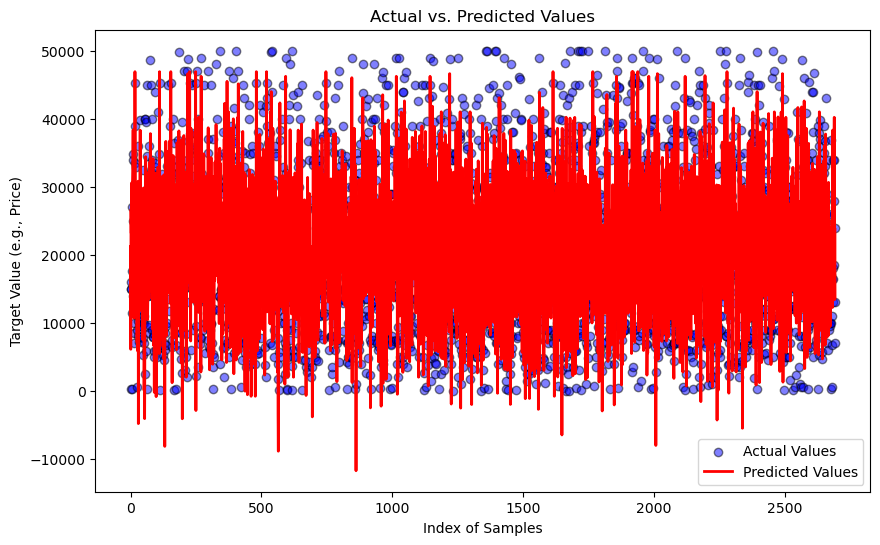

In [439]:
# plot predictions vs actuals 

import matplotlib.pyplot as plt

predictions = pipeline.predict(X_test)

# Actual values
actuals = y_test

# Plotting
plt.figure(figsize=(10, 6))  # Set figure size for better readability

# Plot actuals as scatter plot
plt.scatter(range(len(actuals)), actuals, color='blue', label='Actual Values', alpha=0.5, edgecolor='black')

# Plot predictions as line plot
plt.plot(range(len(predictions)), predictions, color='red', label='Predicted Values', linewidth=2)

# Adding plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index of Samples')
plt.ylabel('Target Value (e.g., Price)')
plt.legend()
plt.show()

#### Insight: 
- Prediction appears to have a good overlap with actuals, but of course areas that could be better explained.
- Especially the negative values are of concern, and the model also doesn't do well at the top price point.


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Reflections

Raw data:
- I wished time of sale would have been made available in the raw data. That could have played in as car prices especially around 2021 increased a lot for used cars.

Correlations:
- It would have been interesting to work a bit more with categorizations to see if I could have maybe done something with manufacturer, type and model.

Models:
- I wondered why the simple multi regression was so close to the other models and why I didn't see much of a difference. I would love to learn more and dig into that.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

# What is the Price of a Car

## Presentation to large group of car eealers at meeting

Hi everyone, 

Nice to meet you. Some of you have met us in the cafeteria and know a bit about what we have been working on but let me explain.

Management has asked us to get a market based perspective on what car prices are. 

We have used a sample of 426k car sales that we cleaned up and used a statistical model that gives you the the price of the car in the market place. This model is not perfect of course but it gives you a tool to understand how different features of the car, e.g. model, color, year, title status etc has had an impact on the price of the car.

### The model

The statistical model found that the following features are most decisive: year, odometer, fuel, type, manufacturer, size and condition. You may already know this but what the model is doing is that it is quantifying the weight of each of these features. 

### How can you use it in your daily day

Each car that is for sale can be entered into a new app that we have created to price it. Once you have entered its features, such as manufacturer, fuel type, condition etc, then the app will tell you what the price of the car is, according to the market. You will also be able to see what the price impact of a feature represents.

An example is this car: 2014 Cadillac, full-size, gas_fuel, fair condition. It comes out to $21,063. It would be fun to ask everyone around here what they think and see where you all are compared to the model. But that is for another time.

### How about your experience vs what the model tells you

Since no model is perfect, and as much experience you may have, use this as an input adding to your knowledge. You can also use it when a customer tries to negotiate with the car, and bring in a comp, and you can then explain that e.g. the change in condition from good to fair has the following impact.

E.g let'say he says he saw a gas fuel Cadillac for less than our diesel version price, and all other features were exactly the same. Same color, condition, year, model etc. He wants to buy our care for no more than 1000 more. But according to the model then 'fuel_diesel' increases price with $1426 where fuel_gas reduces it with $1134 which is a $2560 difference in price. Just for this feature alone. That is what the market tells us at least. If you gave into this buyer then you missed out on a 1500 profit.
This feature and others you can look up via this new model in the app.

### Why is this good for the car dealership?

You may have noticed that we today and in the past have had issues with cars siting on the lot for a long time. It's mostly due to us not pricing them right, and there simply not being buyers at that price.

We have had a tendency to try to wait it out until somebody wanted to pay that price, but at the end of the day it takes up space and is capital intensive for the dealership. Selling cars at the right prices helps on this, and will financially benefit us all.

We can hopefully also attract more customers by sharing with them more knowledge about the market. Demonstrating this type of market knowledge can make them feel more comfortable paying a price that is higher than what they thought it would be.


### Warp up:

We hope that you will find this useful, and not least interesting, and will use it as a tool to get a better feel of the market, but alwasy use your own experience of course. For the good of the future of the car dealership.

Let us know if any questions.

Thanks for your time.
